In [3]:
import tensorflow as tf
from tensorflow import keras

In [6]:
new=keras.models.load_model("D:\model1")

In [8]:
import zipfile
with zipfile.ZipFile("vatelluthu.zip","r") as Zip_ref:
    Zip_ref.extractall()

In [14]:
def prepare_one_shot_data_for_new_classes():
    one_shot_data = {
        'image1': np.random.rand(224, 224, 3),  # replace with actual image data
        'image2': np.random.rand(224, 224, 3),  # replace with actual image data
        'ja': np.array([0, 1])  # replace with actual labels
    }
    return one_shot_data


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Load your pretrained model
pretrained_model_path = "D:\model1"
pretrained_model = tf.keras.models.load_model(pretrained_model_path)

# Freeze layers in the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Define Siamese network architecture
def siamese_network(input_shape, base_model):
    input_1 = layers.Input(input_shape)
    input_2 = layers.Input(input_shape)
    
    output_1 = base_model(input_1)
    output_2 = base_model(input_2)
    
    return models.Model(inputs=[input_1, input_2], outputs=[output_1, output_2])

# Define contrastive loss
def contrastive_loss(y_true, y_pred, margin=1):
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)

# Create Siamese network
siamese_model = siamese_network(input_shape=(224, 224, 3), base_model=pretrained_model)

# Compile the Siamese model with contrastive loss
siamese_model.compile(optimizer='adam', loss=contrastive_loss)

# Load and preprocess the single image
image_path = "image1.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, (224, 224))
image = tf.expand_dims(image, axis=0)  # Add batch dimension
image = image / 255.0  # Normalize pixel values
image=image.numpy()
# Prepare one-shot data (pairs of the same image and its label for one-shot learning)
one_shot_data = {"image1": image, "image2": image, "label":np.array([1.0])}  # Assuming the same image with label 1

# Train the Siamese model with one-shot data
siamese_model.fit([one_shot_data["image1"], one_shot_data["image2"]], one_shot_data["label"], epochs=5, batch_size=1)

# Evaluate the fine-tuned Siamese model
evaluation_results = siamese_model.evaluate([one_shot_data["image1"], one_shot_data["image2"]],one_shot_data["label"])
print("Evaluation results:", evaluation_results)


Epoch 1/5
1/1 [==============================] - 12s 12s/step - loss: 5.9442e-07 - sequential_5_loss: 5.3493e-07 - sequential_5_1_loss: 5.9488e-08
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 9.7944e-04 - sequential_5_loss: 7.6091e-10 - sequential_5_1_loss: 9.7944e-04
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 0.0098 - sequential_5_loss: 0.0098 - sequential_5_1_loss: 2.7978e-08
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 0.0028 - sequential_5_loss: 2.4346e-08 - sequential_5_1_loss: 0.0028
Epoch 5/5
1/1 [==============================] - 1s 576ms/step - loss: 7.5297e-09 - sequential_5_loss: 3.7649e-09 - sequential_5_1_loss: 3.7649e-09
Evaluation results: [7.52971551776227e-09, 3.764857758881135e-09, 3.764857758881135e-09]


In [46]:
# Load and preprocess the new image
new_image_path = "image1.jpg"
new_image = tf.io.read_file(new_image_path)
new_image = tf.image.decode_jpeg(new_image, channels=3)
new_image = tf.image.resize(new_image, (224, 224))
new_image = tf.expand_dims(new_image, axis=0)  # Add batch dimension
new_image = new_image / 255.0  # Normalize pixel values

# Convert the tensor to a numpy array
new_image = new_image.numpy()

# Compare the new image with the known images (image1 and image2 in this case)
preds = siamese_model.predict([new_image, one_shot_data["image1"]])
print("Similarity score with image1:", preds[0])

preds = siamese_model.predict([new_image, one_shot_data["image2"]])
print("Similarity score with image2:", preds[0])


1/1 [==============================] - 0s 32ms/step
Similarity score with image1: [[1.2469798e-18 2.6034444e-25 0.0000000e+00 0.0000000e+00 5.9388244e-19
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.2799474e-18 0.0000000e+00 2.5222690e-31 3.4359498e-33 1.2101899e-29
  0.0000000e+00 0.0000000e+00 1.5146183e-33 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.4234599e-26 0.0000000e+00 1.3358582e-22 1.4037866e-28
  1.7770789e-10 9.6497906e-32 3.1250097e-10 3.7544590e-12 2.4930316e-12
  1.9447291e-23 1.6357638e-14 5.5874526e-23 8.7292403e-17 2.1043471e-07
  5.3336081e-12 1.0017137e-16 1.5151745e-05 6.4120082e-05 1.3075965e-33
  3.6136812e-19 1.4530825e-16 1.0270542e-16 1.1346121e-03 0.0000000e+00
  0.0000000e+00 2.6171240e-19 0.0000000e+00 1.5230693e-36 2.4362857e-33
  0.0000000e+00 0.0000000e+00 6.1725799e-17 0.0000000e+00 0.0000000e+00
  8.3608098e-09 3.4898324e-25 7.5169693e-36 4.8679362e-19 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0569245e-29 6.9015300e

In [45]:
threshold=0.5
preds = siamese_model.predict([new_image, one_shot_data["image1"]])
print("ja" if np.all(preds[0] < threshold) else "different")

preds = siamese_model.predict([new_image, one_shot_data["image2"]])
p="ja"
print( p if np.all(preds[0] < threshold) else "different")


1/1 [==============================] - 0s 47ms/step
ja
1/1 [==============================] - 0s 32ms/step
ja


In [41]:
from deep_translator import GoogleTranslator
translated_text = GoogleTranslator(source='sanskrit', target='tamil').translate(p)
translated_text

'ஜா'

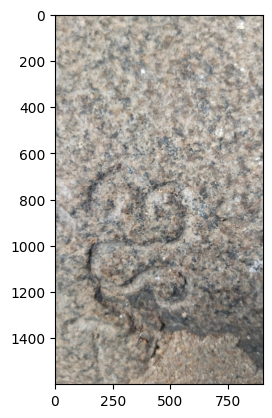

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path = 'image2.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)
plt.show()
